In [1]:
require(tidyverse)
require(survival)

필요한 패키지를 로딩중입니다: tidyverse

─ Attaching packages ──────────────────── tidyverse 1.3.1 ─

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

필요한 패키지를 로딩중입니다: survival



In [2]:
df1 <- read_csv('stage1/input/forSurv1.csv')
df2 <- read_csv('stage1/input/forSurv2.csv')

central <- rbind(df1, df2)

# central_fit <- coxph(Surv(OVRL_SRVL_DTRN_DCNT, BSPT_SRV) ~ BSPT_IDGN_AGE + CEA + OPRT_CNTS + TRTN_CNT,
# data = central, ties = "breslow")

# surv_central <- survfit(central_fit, conf.int = 0.95, 
# ,c(BSPT_IDGN_AGE = 80,CEA = 100, OPRT_CNTS=0, TRTN_CNT=1))

Rows: 5138 Columns: 6

─ Column specification ────────────────────────────
Delimiter: ","
dbl (6): BSPT_SRV, OVRL_SRVL_DTRN_DCNT, BSPT_IDGN_AGE, CEA, OPRT_CNTS, TRTN_CNT


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 5138 Columns: 6

─ Column specification ────────────────────────────
Delimiter: ","
dbl (6): BSPT_SRV, OVRL_SRVL_DTRN_DCNT, BSPT_IDGN_AGE, CEA, OPRT_CNTS, TRTN_CNT


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [2]:
base_surv_list = readRDS('stage5/output/basesurv_total.rds')
H1_risk = readRDS('stage5/input/H1_risk_share_list.rds')
H2_risk = readRDS('stage5/input/H2_risk_share_list.rds')

In [4]:
loss_WIM_para_VAR <- readRDS('stage4/input/loss_WIM_para_VAR.rds') 

In [6]:
loss_WIM_para_VAR %*% c(1,2,3,4)

# 여기서 200개의 파라미터가 있으니 이것들로 계산한다.

likelihood_H1_1,-2.605972
likelihood_H1_2,-2.965963
likelihood_H1_3,-3.288236
likelihood_H1_4,-2.720951
likelihood_H1_5,-3.338506
likelihood_H1_6,-2.979250
likelihood_H1_7,-3.158353
likelihood_H1_8,-2.438140
likelihood_H1_9,-2.904888
likelihood_H1_10,-2.664913
likelihood_H1_11,-2.768969


Warning message in if (!se.fit) conf.type <- "none" else conf.type <- match.arg(conf.type):
“length > 1 이라는 조건이 있고, 첫번째 요소만이 사용될 것입니다”
Warning message in if (se.fit) {:
“length > 1 이라는 조건이 있고, 첫번째 요소만이 사용될 것입니다”
Warning message in if (se.fit) result[[1]][c("n", "time", "n.risk", "n.event", "n.censor", :
“length > 1 이라는 조건이 있고, 첫번째 요소만이 사용될 것입니다”


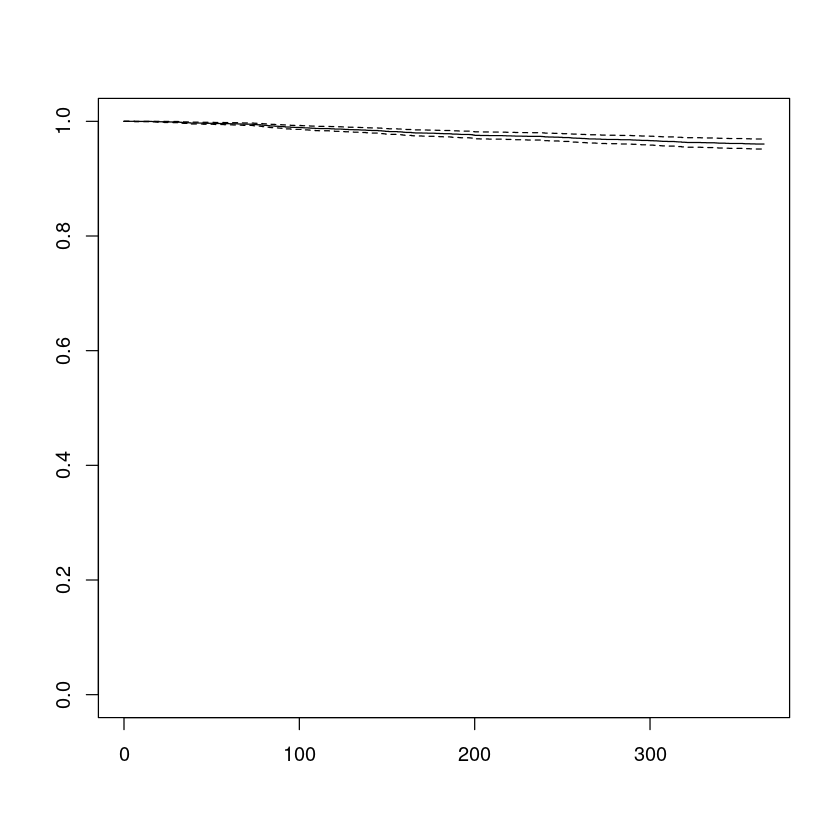

In [20]:
central_fit <- coxph(Surv(OVRL_SRVL_DTRN_DCNT, BSPT_SRV) ~ BSPT_IDGN_AGE + CEA + OPRT_CNTS + TRTN_CNT,
    data = df1, ties = "breslow"
)

surv_central <- survfit(central_fit,
    conf.int = 0.95, ,
    c(BSPT_IDGN_AGE = 80, CEA = 100, OPRT_CNTS = 0, TRTN_CNT = 1)
)

plot(surv_central)

In [24]:
central$BSPT_SRV %>% table

.
   0    1 
9913  363 

In [25]:
data

100,5.088530e-06,9.664073e-06,9.032843e-06,9.912601e-06,6.832632e-06,7.611038e-06,8.606181e-06,9.757423e-06,8.406258e-06,⋯,6.790775e-06,1.203369e-05,7.649850e-06,1.167640e-05,1.004353e-05,5.932146e-06,8.052325e-06,9.187642e-06,6.451978e-06,1.228999e-05
101,1.458869e-05,2.772055e-05,2.593826e-05,2.842601e-05,1.960453e-05,2.182205e-05,2.467747e-05,2.799189e-05,2.410987e-05,⋯,1.947227e-05,3.450671e-05,2.193254e-05,3.347934e-05,2.880112e-05,1.700802e-05,2.308871e-05,2.634923e-05,1.849673e-05,3.524442e-05
102,1.901703e-05,3.548389e-05,3.120996e-05,3.694788e-05,2.465293e-05,2.851307e-05,3.214122e-05,3.568871e-05,3.101117e-05,⋯,2.518263e-05,4.487891e-05,2.860155e-05,4.376744e-05,3.734596e-05,2.219160e-05,3.002188e-05,3.401303e-05,2.416489e-05,4.548653e-05
103,2.472862e-05,4.631090e-05,4.128291e-05,4.807090e-05,3.229518e-05,3.706075e-05,4.179927e-05,4.661511e-05,4.043267e-05,⋯,3.279976e-05,5.838441e-05,3.719122e-05,5.687972e-05,4.861298e-05,2.885142e-05,3.905950e-05,4.431680e-05,3.141167e-05,5.927841e-05
105,3.950123e-05,7.194453e-05,5.817579e-05,7.645073e-05,4.881134e-05,5.941704e-05,6.668230e-05,7.197445e-05,6.327876e-05,⋯,5.176375e-05,9.293856e-05,5.944742e-05,9.125906e-05,7.702877e-05,4.615438e-05,6.215618e-05,6.977489e-05,4.880906e-05,9.365282e-05
106,4.452536e-05,8.148467e-05,6.708827e-05,8.623913e-05,5.555490e-05,6.693337e-05,7.518101e-05,8.160732e-05,7.157746e-05,⋯,5.846682e-05,1.048209e-04,6.700060e-05,1.027913e-04,8.694513e-05,5.201206e-05,7.010641e-05,7.884636e-05,5.553807e-05,1.056593e-04
107,5.287015e-05,9.725517e-05,8.164928e-05,1.024548e-04,6.669136e-05,7.940007e-05,8.928313e-05,9.753015e-05,8.531389e-05,⋯,6.956442e-05,1.245007e-04,7.952295e-05,1.219193e-04,1.033706e-04,6.173589e-05,8.327905e-05,9.386171e-05,6.665185e-05,1.255528e-04
108,5.735284e-05,1.051099e-04,8.696732e-05,1.110831e-04,7.179512e-05,8.617504e-05,9.683888e-05,1.053172e-04,9.229749e-05,⋯,7.534350e-05,1.350010e-04,8.627412e-05,1.323357e-04,1.120196e-04,6.698378e-05,9.029749e-05,1.016182e-04,7.176690e-05,1.361100e-04
109,6.857762e-05,1.264297e-04,1.069031e-04,1.329448e-04,8.686858e-05,1.029620e-04,1.158200e-04,1.268367e-04,1.108424e-04,⋯,9.033027e-05,1.615457e-04,1.031522e-04,1.580860e-04,1.341760e-04,8.006841e-05,1.080632e-04,1.218846e-04,8.680760e-05,1.629271e-04
11,7.442180e-05,1.375067e-04,1.171979e-04,1.443284e-04,9.468319e-05,1.117105e-04,1.257046e-04,1.380143e-04,1.204817e-04,⋯,9.812387e-05,1.753700e-04,1.119436e-04,1.715098e-04,1.457070e-04,8.688350e-05,1.173122e-04,1.324287e-04,9.460613e-05,1.769199e-04
111,8.197765e-05,1.517808e-04,1.303880e-04,1.590081e-04,1.047397e-04,1.230052e-04,1.384787e-04,1.524081e-04,1.329123e-04,⋯,1.081791e-04,1.932173e-04,1.233008e-04,1.888581e-04,1.605931e-04,9.568868e-05,1.292506e-04,1.460313e-04,1.042660e-04,1.951180e-04


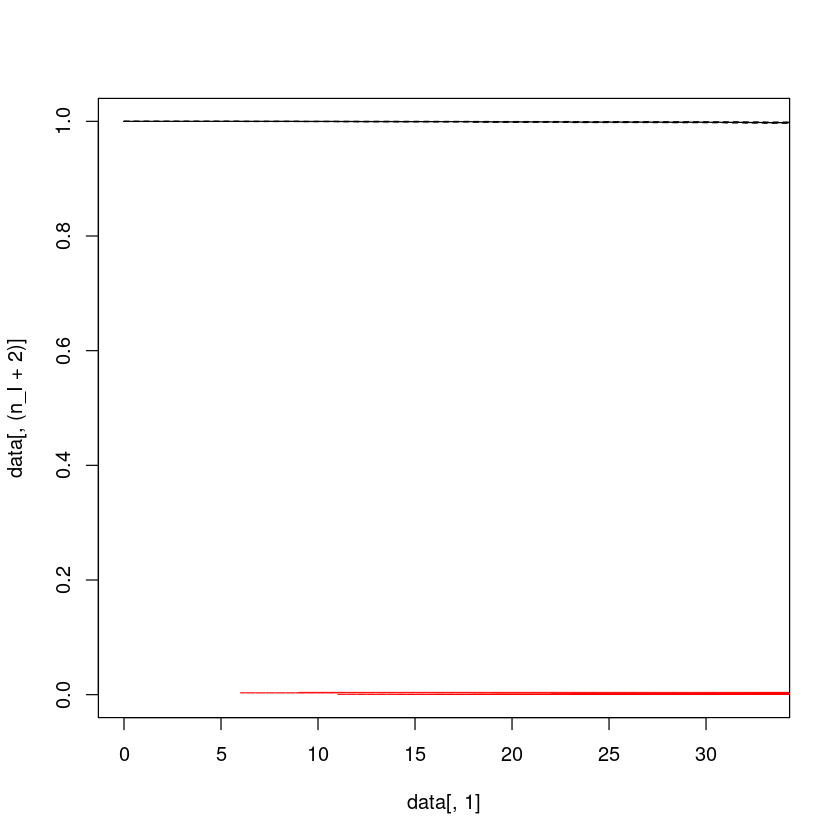

In [19]:
n_I <- 200
plot(data[,1], data[,(n_I+2)], type='l', col='red', lty=1, lwd=0.5, xlim=c(0,32.9869), ylim=c(0,1))
lines(data[,1], data[,(n_I+3)], type='l', col='red', lty=2, lwd=0.5)
lines(surv_central, col='black')

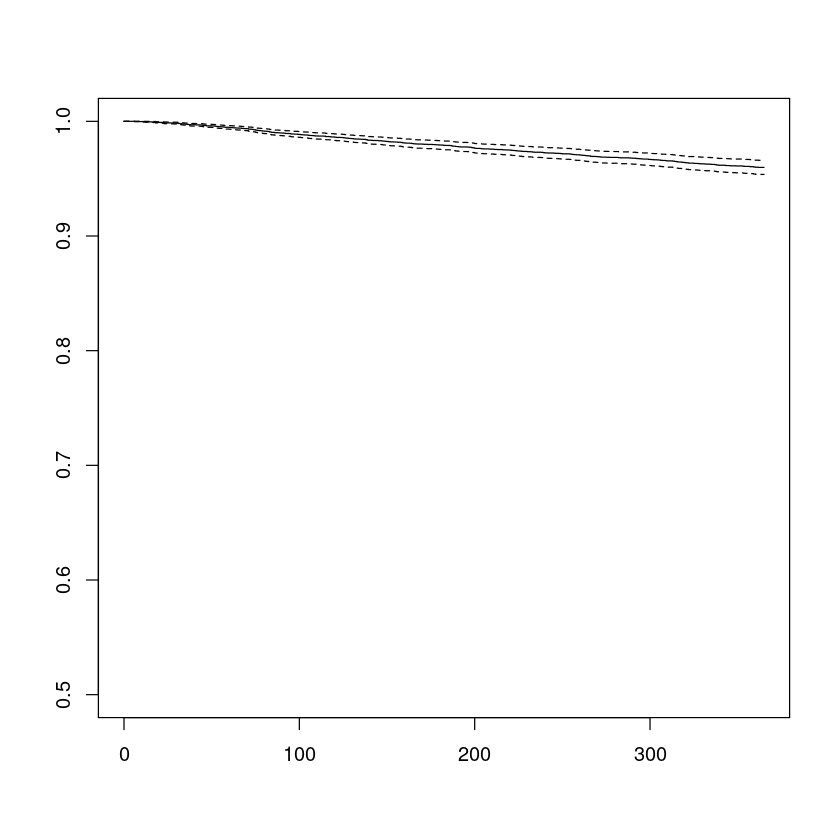

In [28]:
plot(surv_central, ylim=c(0.5, 1))

Readme 파일 만들고